<a href="https://colab.research.google.com/github/Nimrat4/nlp_tasks/blob/main/week8nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')


text = [
    "I enjoy learning about artificial intelligence.",
    "Deep learning and neural networks are fascinating.",
    "Natural Language Processing involves neural networks and AI."
]

def preprocess(t):
    t = t.lower()
    t = re.sub(r'[^a-z\s]', '', t)
    return word_tokenize(t)

tok = [preprocess(s) for s in text]
vocab = sorted(set(w for s in tok for w in s))
n = len(vocab)

co = pd.DataFrame(np.zeros((n, n), dtype=int), index=vocab, columns=vocab)

for s in tok:
    for i, w in enumerate(s):
        for j in range(max(i - 3, 0), min(i + 4, len(s))):
            if i != j: #we dont count the word itself as a context
                co.at[w, s[j]] += 1 #increments count for how many times w and s[j] appear together within the window

co


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,about,ai,and,are,artificial,deep,enjoy,fascinating,i,intelligence,involves,language,learning,natural,networks,neural,processing
about,0,0,0,0,1,0,1,0,1,1,0,0,1,0,0,0,0
ai,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
and,0,1,0,1,0,1,0,0,0,0,1,0,1,0,2,2,0
are,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0
artificial,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0
deep,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
enjoy,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
fascinating,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0
i,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
intelligence,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [2]:
from sklearn.decomposition import TruncatedSVD

x = co.values
svd = TruncatedSVD(n_components=2)
x_red = svd.fit_transform(x) #2d latent semantic embeddings
x_approx = np.dot(x_red, svd.components_) #reconstructing using only topt 2 dimensions word vectors in reduced dimension, directional basis vectors

pd.DataFrame(x_red, index=vocab, columns=['Dim1', 'Dim2'])


,Dim1,Dim2
about,0.518232,1.835995
ai,1.366666,-0.241100
and,2.988271,-0.188133
are,1.532765,-0.308289
artificial,0.466996,1.583796
deep,1.182519,0.272333
enjoy,0.466996,1.583796
fascinating,1.157872,-0.270902
i,0.408409,1.269047
intelligence,0.408409,1.269047


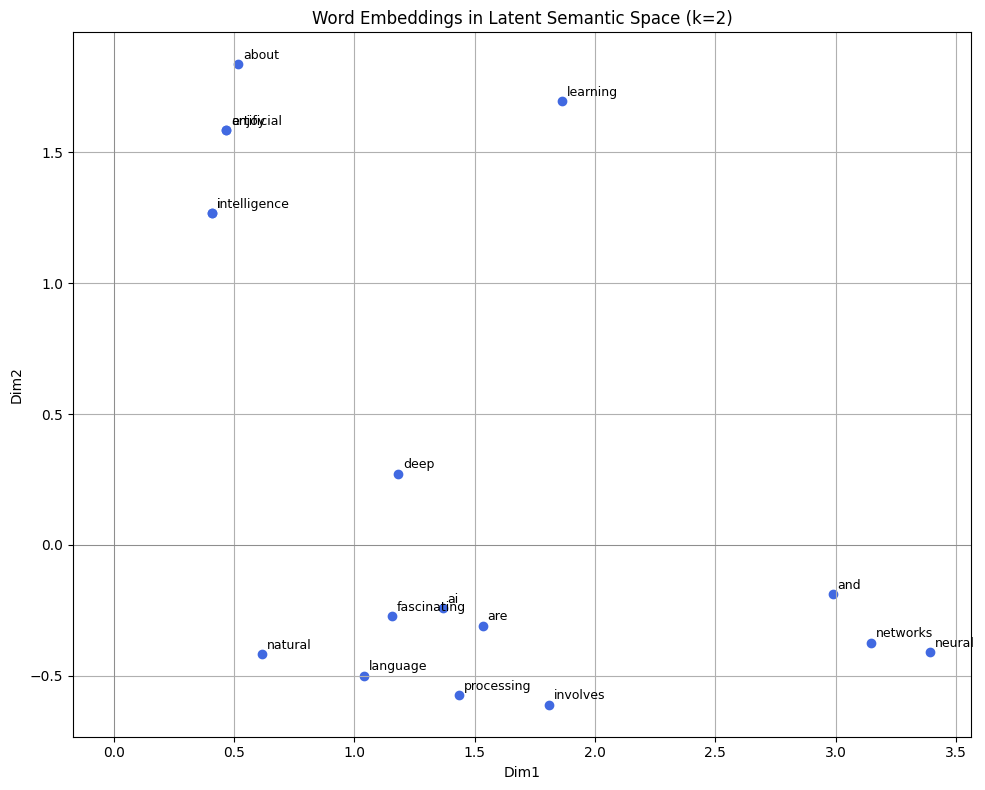

In [3]:
import matplotlib.pyplot as plt

red_df = pd.DataFrame(x_red, index=vocab, columns=['Dim1', 'Dim2'])
plt.figure(figsize=(10, 8))
plt.scatter(red_df['Dim1'], red_df['Dim2'], color='royalblue')
for w, (x, y) in red_df.iterrows():
    plt.text(x + 0.02, y + 0.02, w, fontsize=9)
plt.title("Word Embeddings in Latent Semantic Space (k=2)")
plt.xlabel("Dim1")
plt.ylabel("Dim2")
plt.grid(True)
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.tight_layout()
plt.show()



In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd

docs = [
    "Deep learning enhances computer vision.",
    "AI-based chatbots improve customer support.",
    "Neural networks power modern NLP applications.",
    "Data science requires statistics and machine learning."
]

lbls = ['CV', 'CustomerSupport', 'NLP', 'DataScience'] #class labels

vec = TfidfVectorizer()
X = vec.fit_transform(docs) #docs into td idf matrix

clf = LogisticRegression()
clf.fit(X, lbls)

pred = clf.predict(X)
print("Accuracy:", accuracy_score(lbls, pred))
print("Predictions:", pred)

feat = vec.get_feature_names_out() #dataframe
df = pd.DataFrame(X.toarray(), columns=feat, index=docs)
print(df.round(2))



Accuracy: 1.0
Predictions: ['CV' 'CustomerSupport' 'NLP' 'DataScience']
                                                      ai   and  applications  \
Deep learning enhances computer vision.             0.00  0.00          0.00   
AI-based chatbots improve customer support.         0.41  0.00          0.00   
Neural networks power modern NLP applications.      0.00  0.00          0.41   
Data science requires statistics and machine le...  0.00  0.39          0.00   

                                                    based  chatbots  computer  \
Deep learning enhances computer vision.              0.00      0.00      0.47   
AI-based chatbots improve customer support.          0.41      0.41      0.00   
Neural networks power modern NLP applications.       0.00      0.00      0.00   
Data science requires statistics and machine le...   0.00      0.00      0.00   

                                                    customer  data  deep  \
Deep learning enhances computer vision.      